# 새 섹션

# 새 섹션

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input,Dense,Conv2D,MaxPooling2D,UpSampling2D,Flatten,Reshape
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#mnist 데이터 셋 불러오기
(X_train, _),(X_test, _) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0],28,28,1).astype('float32')/255
X_test = X_test.reshape(X_test.shape[0],28,28,1).astype('float32')/255

In [ ]:
#생성자 모델 만들기
autoencoder=Sequential()

In [ ]:
#인코딩하는 부분
autoencoder.add(Conv2D(16,kernel_size=3,padding='same',input_shape=(28,28,1),activation='relu'))
autoencoder.add(MaxPooling2D(pool_size=2,padding='same'))
autoencoder.add(Conv2D(8,kernel_size=3,activation='relu',padding='same'))
autoencoder.add(MaxPooling2D(pool_size=2,padding='same'))
autoencoder.add(Conv2D(8,kernel_size=3,strides=2,padding='same',activation='relu'))

In [ ]:
#디코딩하는 부분
autoencoder.add(Conv2D(8,kernel_size=3,padding='same',activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(8,kernel_size=3,padding='same',activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(16,kernel_size=3,activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(1,kernel_size=3,padding='same',activation='sigmoid'))

In [ ]:
#전체 구조 확인
autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 4, 4, 8)           584       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 4, 4, 8)           584       
_________________________________________________________________
up_sampling2d_12 (UpSampling (None, 8, 8, 8)          

In [ ]:
#모델 컴파일 및 학습
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')
autoencoder.fit(X_train, X_train, epochs=10, batch_size=128, validation_data=(X_test, X_test))

Epoch 1/10
469/469 [==============================] - 73s 156ms/step - loss: 0.1003 - val_loss: 0.0964
Epoch 2/10
469/469 [==============================] - 72s 154ms/step - loss: 0.0974 - val_loss: 0.0953
Epoch 3/10
469/469 [==============================] - 72s 154ms/step - loss: 0.0959 - val_loss: 0.0948
Epoch 4/10
469/469 [==============================] - 72s 154ms/step - loss: 0.0954 - val_loss: 0.0933
Epoch 5/10
469/469 [==============================] - 73s 155ms/step - loss: 0.0942 - val_loss: 0.0924
Epoch 6/10
469/469 [==============================] - 73s 155ms/step - loss: 0.0932 - val_loss: 0.0914
Epoch 7/10
469/469 [==============================] - 72s 154ms/step - loss: 0.0924 - val_loss: 0.0907
Epoch 8/10
469/469 [==============================] - 73s 156ms/step - loss: 0.0916 - val_loss: 0.0900
Epoch 9/10
469/469 [==============================] - 72s 154ms/step - loss: 0.0909 - val_loss: 0.0899
Epoch 10/10
469/469 [==============================] - 72s 154ms/step - l

In [ ]:
#학습된 결과
random_test=np.random.randint(X_test.shape[0],size=5)

In [ ]:
#텍스트할 이미지를 랜덤으로 호출
ae_imgs=autoencoder.predict(X_test)

In [ ]:
#출력이미지의 크기 정하기
plt.figure(figsize=(7,2))

<Figure size 504x144 with 0 Axes>

<Figure size 504x144 with 0 Axes>

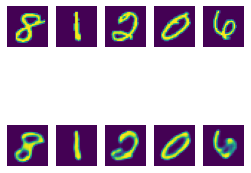

In [ ]:
for i,image_idx in enumerate(random_test):
  ax=plt.subplot(2,7,i+1)
  plt.imshow(X_test[image_idx].reshape(28,28))
  ax.axis('off')
  ax=plt.subplot(2,7,7+i+1)
  #오토 인코더 결과를 나열해서 보여줌
  plt.imshow(ae_imgs[image_idx].reshape(28,28))
  ax.axis('off')
plt.show()

#----첫번째 사진 : 원본 이미지
#----두번째 사진 : 오토인코더 결과